## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


model = build_mlp()

In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




In [6]:
"""
設定要訓練的 Epoch 數
"""
epochs = 500
model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 108us/step - loss: 2.2891 - acc: 0.1372 - val_loss: 2.2449 - val_acc: 0.1712
Epoch 2/500
50000/50000 [==============================] - 3s 65us/step - loss: 2.2134 - acc: 0.2012 - val_loss: 2.1842 - val_acc: 0.2144
Epoch 3/500
50000/50000 [==============================] - 3s 67us/step - loss: 2.1571 - acc: 0.2380 - val_loss: 2.1326 - val_acc: 0.2471
Epoch 4/500
50000/50000 [==============================] - 3s 70us/step - loss: 2.1083 - acc: 0.2639 - val_loss: 2.0881 - val_acc: 0.2665
Epoch 5/500
50000/50000 [==============================] - 3s 68us/step - loss: 2.0660 - acc: 0.2808 - val_loss: 2.0478 - val_acc: 0.2856
Epoch 6/500
50000/50000 [==============================] - 3s 66us/step - loss: 2.0292 - acc: 0.2938 - val_loss: 2.0139 - val_acc: 0.2981
Epoch 7/500
50000/50000 [=

50000/50000 [==============================] - 3s 68us/step - loss: 1.6606 - acc: 0.4233 - val_loss: 1.6663 - val_acc: 0.4229
Epoch 56/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.6573 - acc: 0.4239 - val_loss: 1.6638 - val_acc: 0.4183
Epoch 57/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.6544 - acc: 0.4245 - val_loss: 1.6592 - val_acc: 0.4207
Epoch 58/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.6512 - acc: 0.4256 - val_loss: 1.6574 - val_acc: 0.4228
Epoch 59/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.6484 - acc: 0.4280 - val_loss: 1.6563 - val_acc: 0.4202
Epoch 60/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.6453 - acc: 0.4275 - val_loss: 1.6511 - val_acc: 0.4254
Epoch 61/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.6423 - acc: 0.4298 - val_loss: 1.6507 - val_acc: 0.4273
Epoch 62/500
50000/50000 [==============

Epoch 114/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.5203 - acc: 0.4719 - val_loss: 1.5445 - val_acc: 0.4571
Epoch 115/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.5184 - acc: 0.4729 - val_loss: 1.5462 - val_acc: 0.4609
Epoch 116/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.5166 - acc: 0.4728 - val_loss: 1.5477 - val_acc: 0.4564
Epoch 117/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.5147 - acc: 0.4747 - val_loss: 1.5402 - val_acc: 0.4614
Epoch 118/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.5128 - acc: 0.4744 - val_loss: 1.5388 - val_acc: 0.4614
Epoch 119/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.5108 - acc: 0.4760 - val_loss: 1.5398 - val_acc: 0.4612
Epoch 120/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.5088 - acc: 0.4768 - val_loss: 1.5353 - val_acc: 0.4635
Epoch 121/500
50000/

50000/50000 [==============================] - 3s 67us/step - loss: 1.4234 - acc: 0.5048 - val_loss: 1.4766 - val_acc: 0.4784
Epoch 173/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.4224 - acc: 0.5051 - val_loss: 1.4730 - val_acc: 0.4834
Epoch 174/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.4204 - acc: 0.5062 - val_loss: 1.4770 - val_acc: 0.4824
Epoch 175/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.4189 - acc: 0.5055 - val_loss: 1.4713 - val_acc: 0.4846
Epoch 176/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.4178 - acc: 0.5072 - val_loss: 1.4815 - val_acc: 0.4756
Epoch 177/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.4161 - acc: 0.5070 - val_loss: 1.4748 - val_acc: 0.4823
Epoch 178/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.4149 - acc: 0.5084 - val_loss: 1.4765 - val_acc: 0.4788
Epoch 179/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 1.3411 - acc: 0.5321 - val_loss: 1.4266 - val_acc: 0.4989
Epoch 231/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.3393 - acc: 0.5327 - val_loss: 1.4377 - val_acc: 0.4931
Epoch 232/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3385 - acc: 0.5347 - val_loss: 1.4205 - val_acc: 0.5027
Epoch 233/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.3367 - acc: 0.5352 - val_loss: 1.4347 - val_acc: 0.4978
Epoch 234/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3358 - acc: 0.5346 - val_loss: 1.4216 - val_acc: 0.4998
Epoch 235/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3348 - acc: 0.5349 - val_loss: 1.4241 - val_acc: 0.4997
Epoch 236/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.3332 - acc: 0.5350 - val_loss: 1.4162 - val_acc: 0.5013
Epoch 237/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 1.2678 - acc: 0.5582 - val_loss: 1.3966 - val_acc: 0.5074
Epoch 289/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2671 - acc: 0.5592 - val_loss: 1.4139 - val_acc: 0.5024
Epoch 290/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.2656 - acc: 0.5585 - val_loss: 1.4057 - val_acc: 0.5050
Epoch 291/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.2640 - acc: 0.5593 - val_loss: 1.3956 - val_acc: 0.5069
Epoch 292/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.2627 - acc: 0.5617 - val_loss: 1.3870 - val_acc: 0.5135
Epoch 293/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2617 - acc: 0.5607 - val_loss: 1.3865 - val_acc: 0.5120
Epoch 294/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.2606 - acc: 0.5603 - val_loss: 1.3845 - val_acc: 0.5118
Epoch 295/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 1.2008 - acc: 0.5827 - val_loss: 1.3644 - val_acc: 0.5188
Epoch 347/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.2002 - acc: 0.5824 - val_loss: 1.3658 - val_acc: 0.5176
Epoch 348/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1983 - acc: 0.5830 - val_loss: 1.3608 - val_acc: 0.5223
Epoch 349/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.1975 - acc: 0.5827 - val_loss: 1.3809 - val_acc: 0.5185
Epoch 350/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1968 - acc: 0.5831 - val_loss: 1.3556 - val_acc: 0.5208
Epoch 351/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.1951 - acc: 0.5844 - val_loss: 1.3651 - val_acc: 0.5226
Epoch 352/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.1947 - acc: 0.5837 - val_loss: 1.3590 - val_acc: 0.5195
Epoch 353/500
50000/50000 [=======

50000/50000 [==============================] - 3s 66us/step - loss: 1.1374 - acc: 0.6035 - val_loss: 1.3885 - val_acc: 0.5072
Epoch 405/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.1365 - acc: 0.6041 - val_loss: 1.3769 - val_acc: 0.5174
Epoch 406/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.1360 - acc: 0.6045 - val_loss: 1.3668 - val_acc: 0.5176
Epoch 407/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.1343 - acc: 0.6060 - val_loss: 1.3574 - val_acc: 0.5240
Epoch 408/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.1341 - acc: 0.6057 - val_loss: 1.3393 - val_acc: 0.5267
Epoch 409/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1325 - acc: 0.6064 - val_loss: 1.3476 - val_acc: 0.5289
Epoch 410/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.1312 - acc: 0.6067 - val_loss: 1.3579 - val_acc: 0.5216
Epoch 411/500
50000/50000 [=======

50000/50000 [==============================] - 3s 65us/step - loss: 1.0781 - acc: 0.6259 - val_loss: 1.3651 - val_acc: 0.5216
Epoch 463/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0764 - acc: 0.6268 - val_loss: 1.3460 - val_acc: 0.5252
Epoch 464/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0763 - acc: 0.6267 - val_loss: 1.3290 - val_acc: 0.5298
Epoch 465/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.0744 - acc: 0.6264 - val_loss: 1.3506 - val_acc: 0.5256
Epoch 466/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0748 - acc: 0.6261 - val_loss: 1.3468 - val_acc: 0.5210
Epoch 467/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.0720 - acc: 0.6285 - val_loss: 1.3391 - val_acc: 0.5282
Epoch 468/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.0738 - acc: 0.6265 - val_loss: 1.3369 - val_acc: 0.5285
Epoch 469/500
50000/50000 [=======

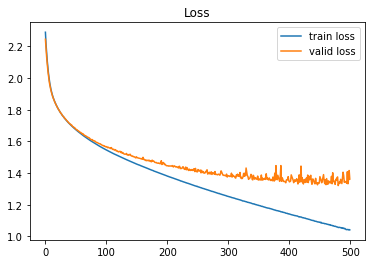

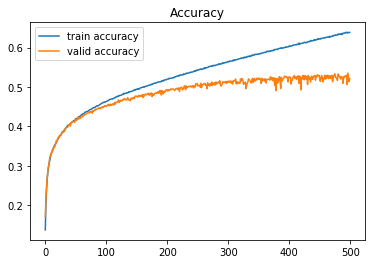

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()